## Comprehensive Data Exploration with Python

### Pedro Marcelino

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
import missingno as msno
import numpy as np

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df1 = df
df1.columns = df1.columns.str.replace(' ', '_')

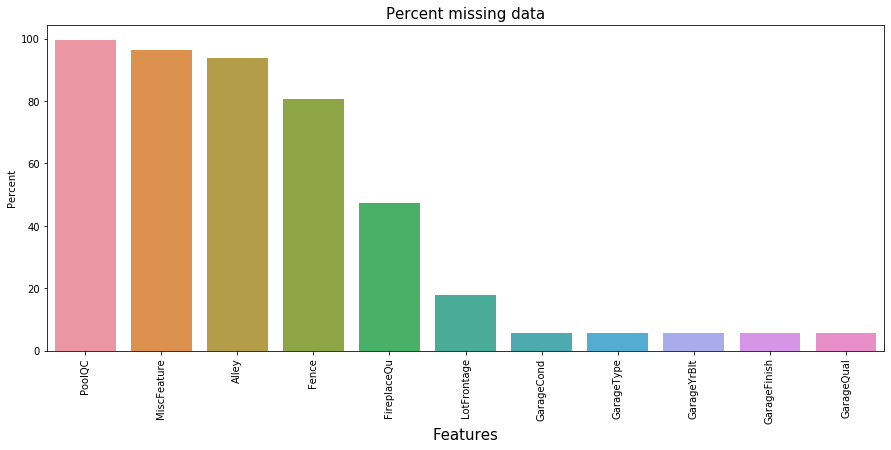

In [6]:
total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
filtered_df = pd.concat([total, percent], axis=1, keys=['Total', 'percent'])
filtered_df = filtered_df[filtered_df['percent']>=5]
fig, ax = plt.subplots(figsize=(15,6))
plt.xticks(rotation=90)
sns.barplot(x=filtered_df.index, y=filtered_df.percent)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent')
plt.title('Percent missing data', fontsize=15)
plt.show()


In [5]:
filtered_df.head(15)

,Total,percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


In [43]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table


In [44]:
missing_zero_values_table(df1)

Your selected dataframe has 80 columns and 1459 Rows.
There are 33 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
PoolQC,0,1456,99.8,1456,99.8,object
MiscFeature,0,1408,96.5,1408,96.5,object
Alley,0,1352,92.7,1352,92.7,object
Fence,0,1169,80.1,1169,80.1,object
FireplaceQu,0,730,50.0,730,50.0,object
LotFrontage,0,227,15.6,227,15.6,float64
GarageCond,0,78,5.3,78,5.3,object
GarageYrBlt,0,78,5.3,78,5.3,float64
GarageQual,0,78,5.3,78,5.3,object
GarageFinish,0,78,5.3,78,5.3,object


In [143]:
filtered_data = msno.nullity_filter(df1, filter='bottom', n=15, p=0.99)

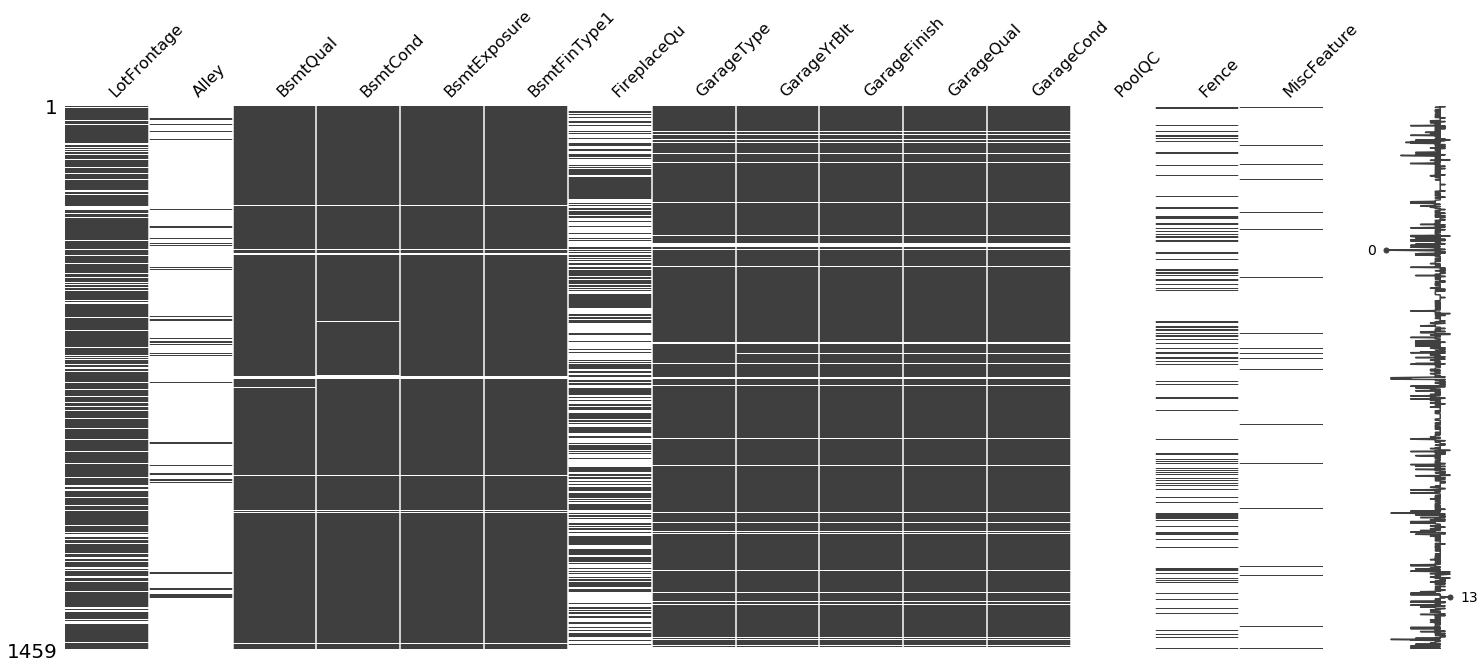

In [144]:
msno.matrix(filtered_data)

In [145]:
sorted_data = msno.nullity_sort(filtered_data, sort='descending')

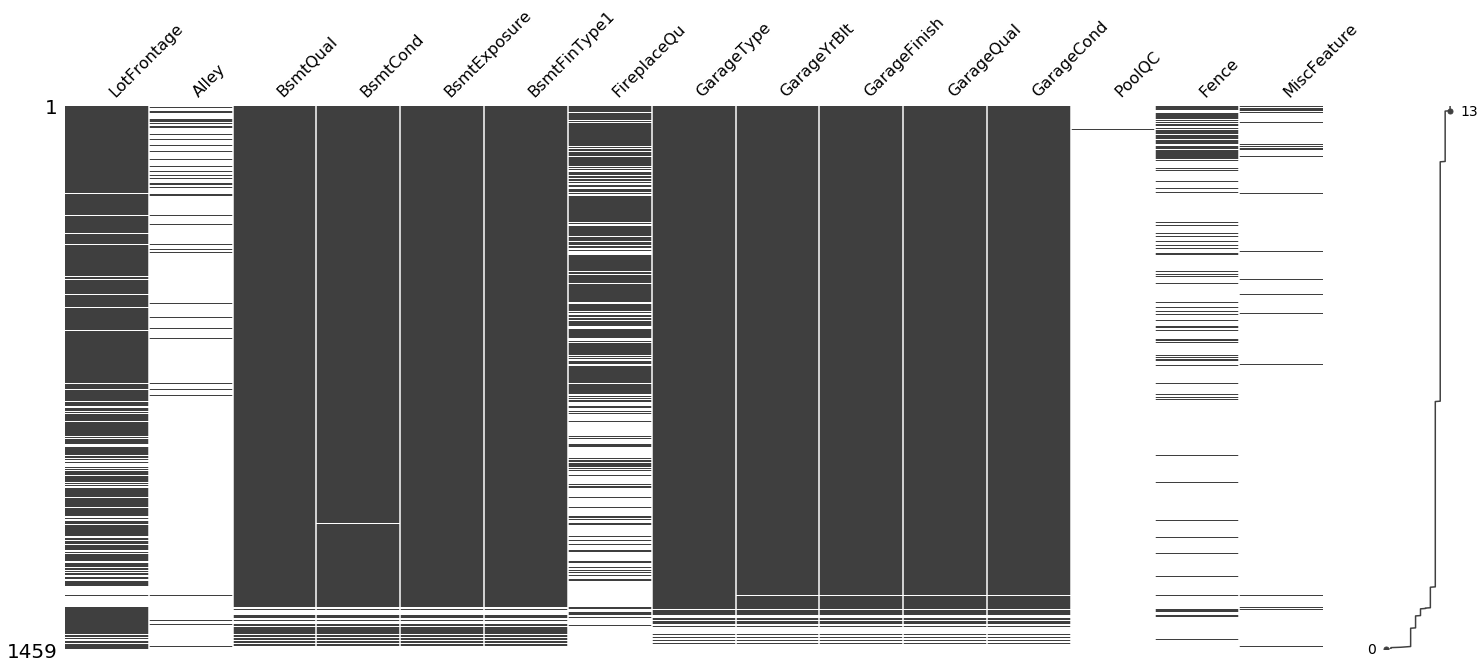

In [146]:
msno.matrix(sorted_data)

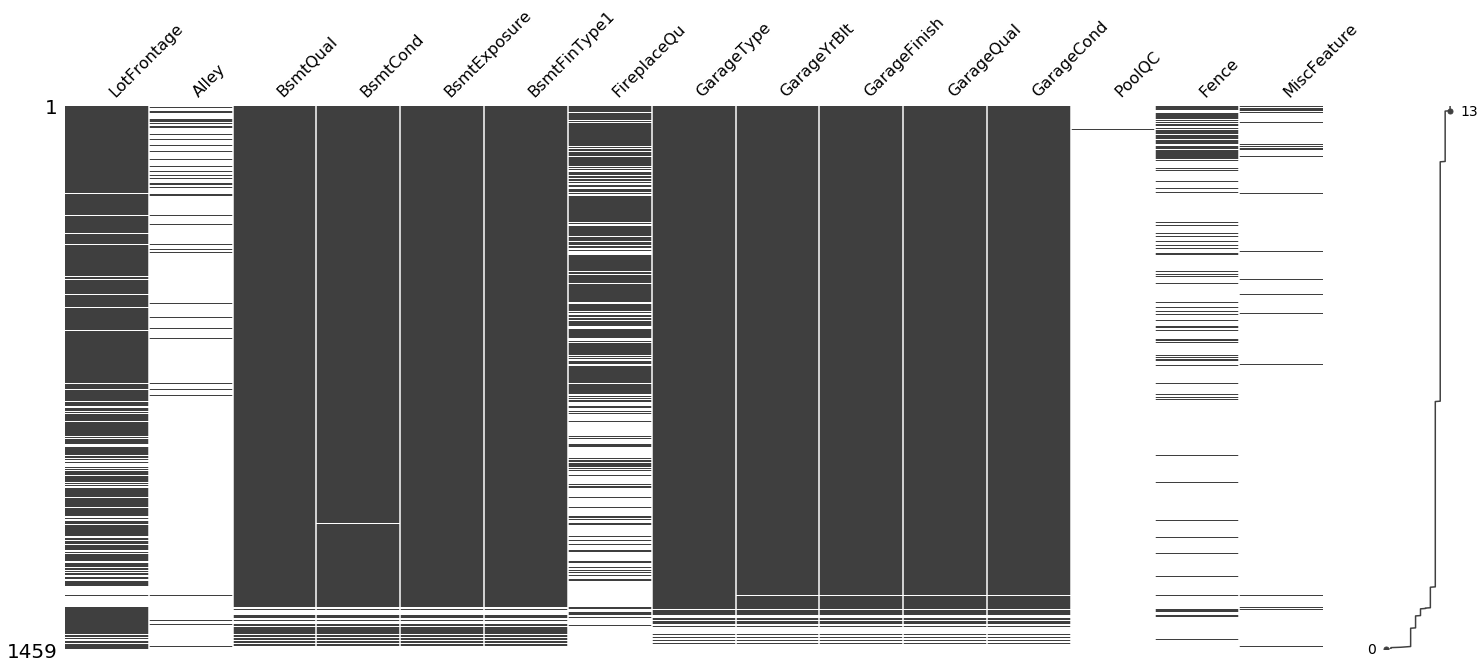

In [150]:
filtered_dat = msno.matrix(df1, filter='bottom', n=15, p=0.99, sort='descending')

In [80]:
sorted_file = df.sort_values('FireplaceQu')

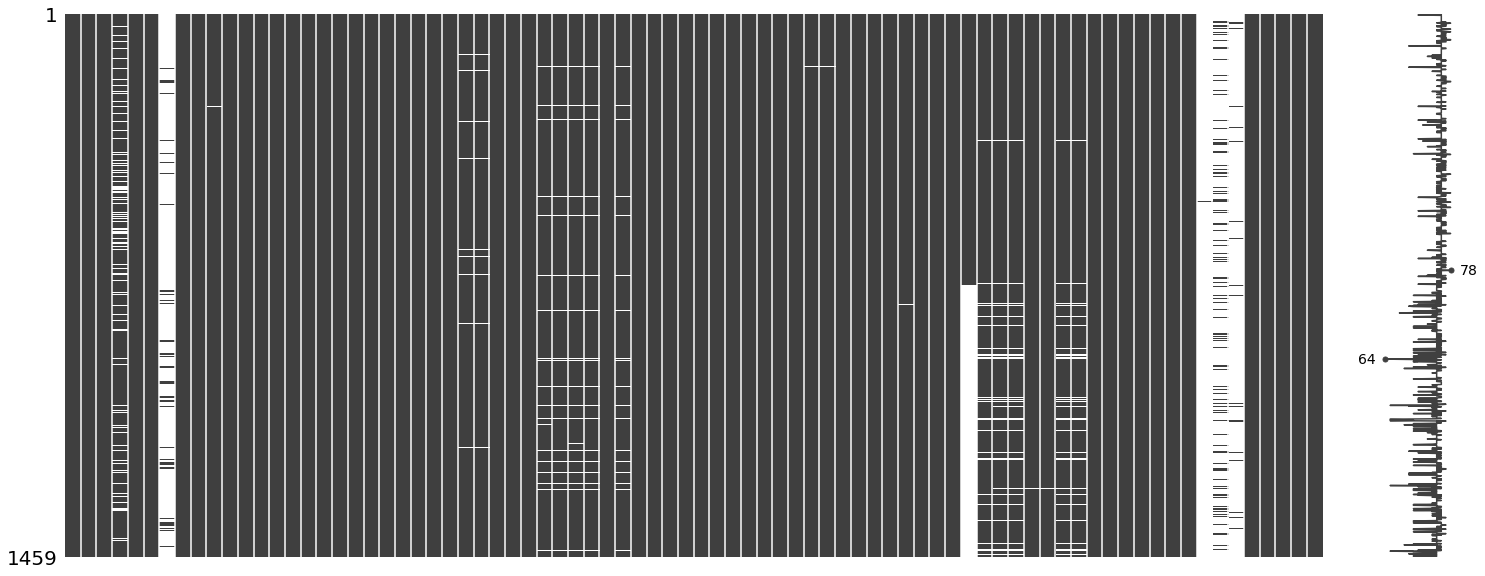

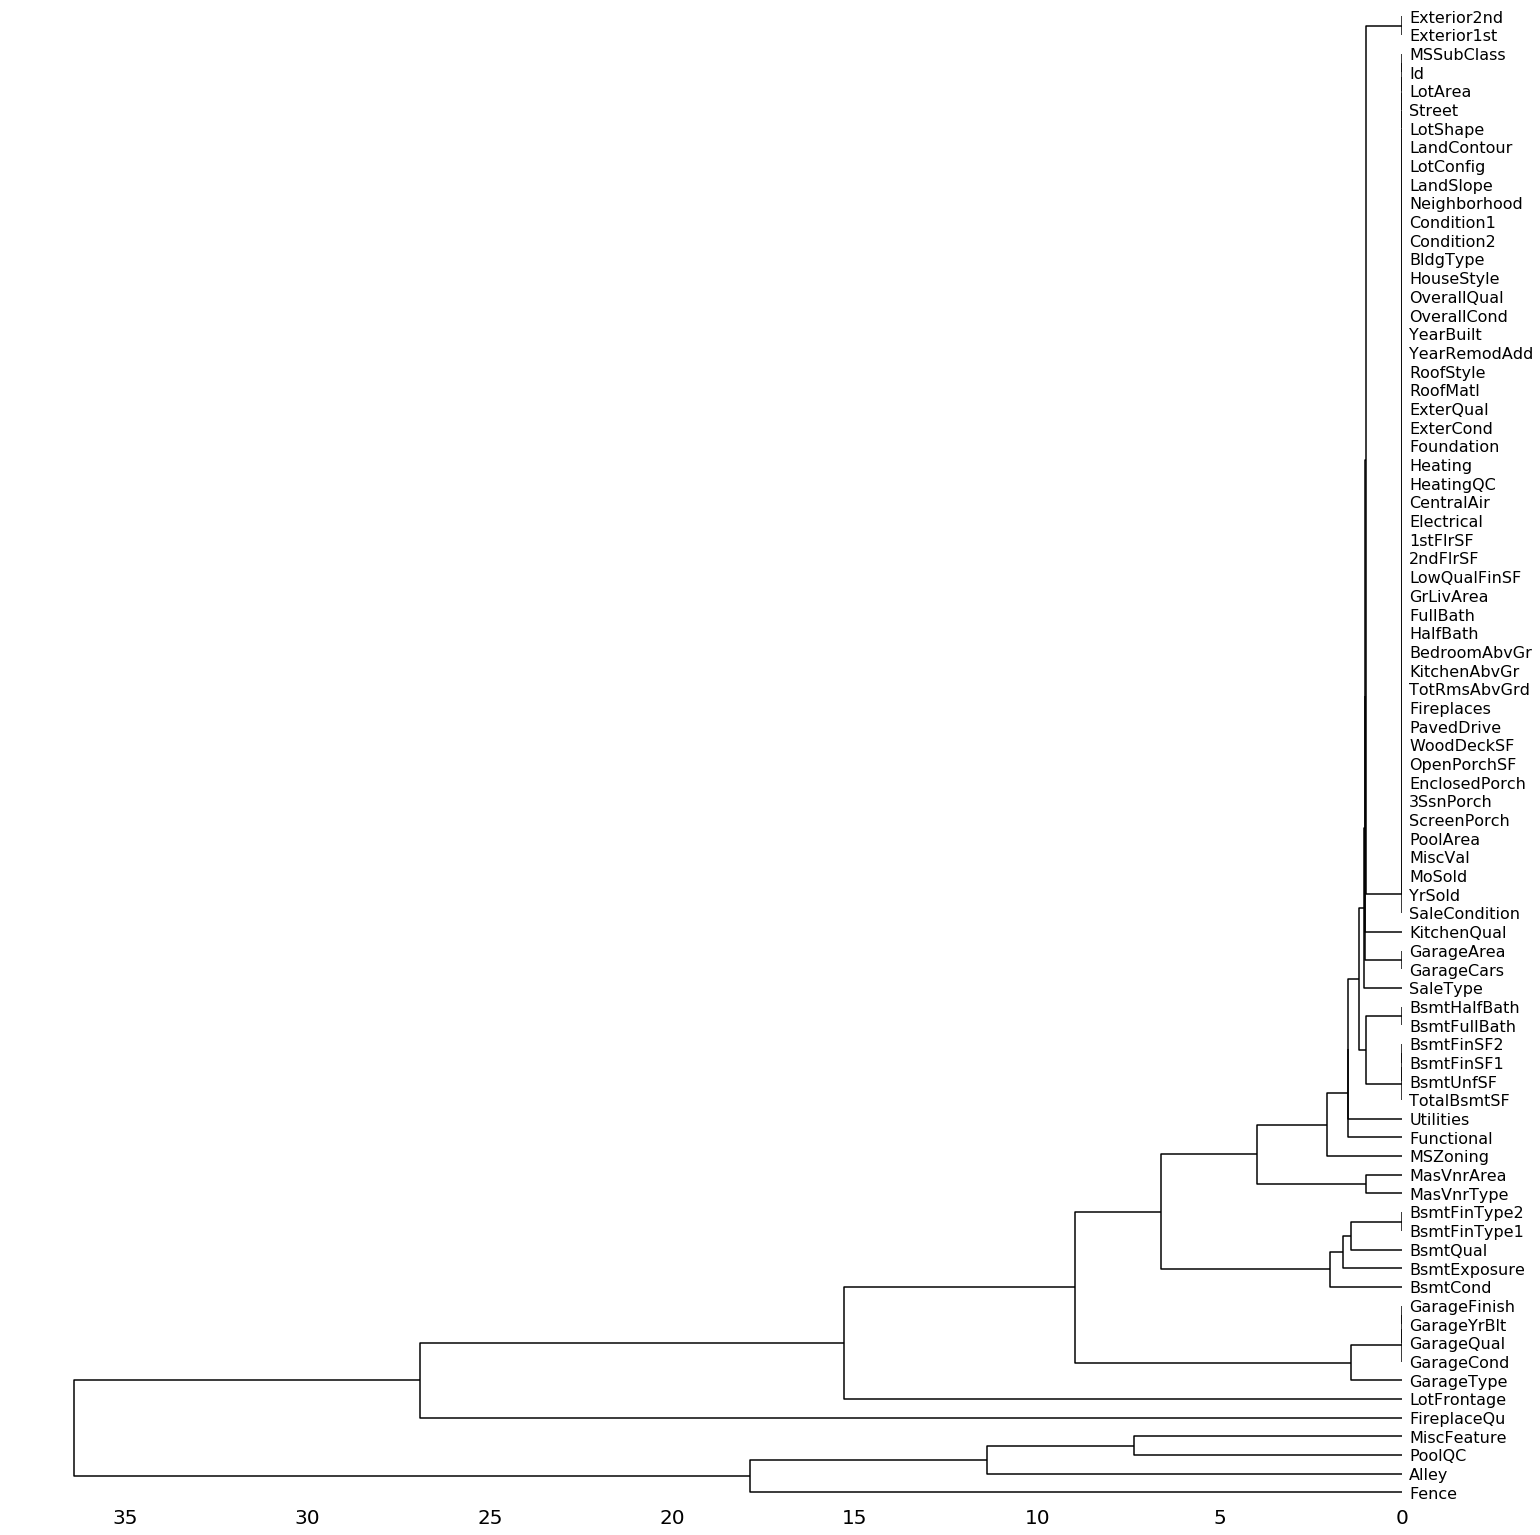

In [91]:
msno.matrix(sorted_file, n=5, p=0.99)
msno.dendrogram(sorted_file)

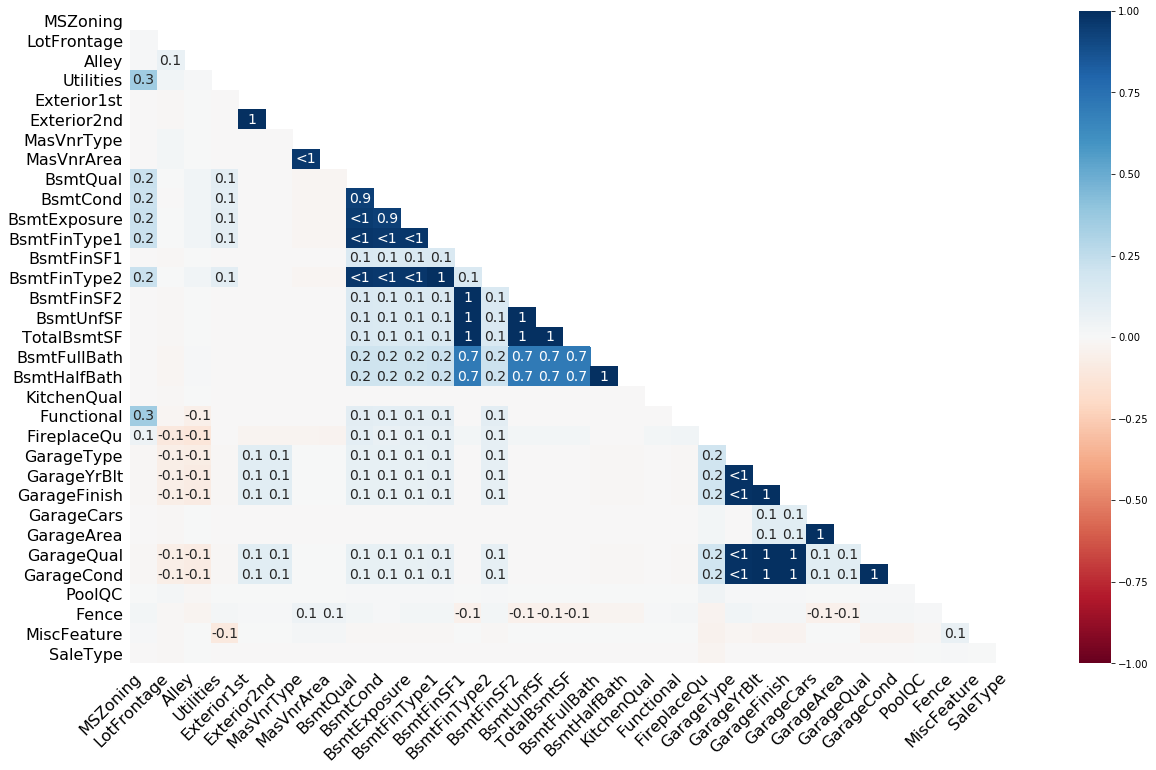

In [94]:
msno.heatmap(sorted_file)

#### Observing unique values in columns
##### how to sort columns by unique numbers of values inside columns?

In [ ]:
house.columns.nunique
for house in df.columns:
    print(f'Columns: {house} \nUnique values: {df[house].unique()}')

Index(['LotFrontage', 'Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [ ]:
df = df.drop(df.loc[df['Electrical'].isnull()])

Int64Index([  39,   48,   78,   88,   89,   99,  108,  125,  127,  140,  148,
             155,  163,  165,  198,  210,  241,  250,  287,  291,  307,  375,
             386,  393,  431,  434,  441,  464,  495,  520,  528,  533,  535,
             562,  582,  613,  614,  620,  635,  636,  638,  649,  705,  710,
             738,  750,  784,  826,  843,  921,  942,  954,  960,  968,  970,
             976, 1009, 1011, 1030, 1038, 1096, 1123, 1131, 1137, 1143, 1173,
            1179, 1218, 1219, 1234, 1257, 1283, 1323, 1325, 1326, 1337, 1349,
            1407, 1449, 1450, 1453],
           dtype='int64')

In [173]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

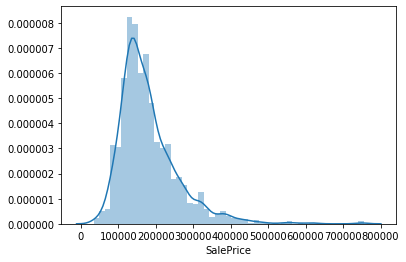

In [175]:
sns.distplot(df['SalePrice'])
plt.show()

In [178]:
print('Skewness: %f '% df['SalePrice'].skew())
print('Kurtosis: %f '% df['SalePrice']. kurt())

Skewness: 1.882876 
Kurtosis: 6.536282 


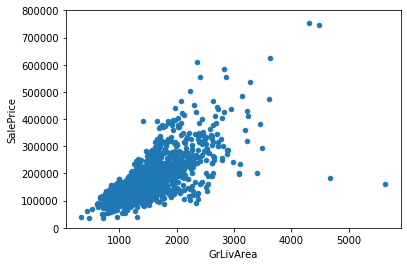

In [181]:
var = 'GrLivArea'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000));

(-0.5, 9.5, 0, 800000)

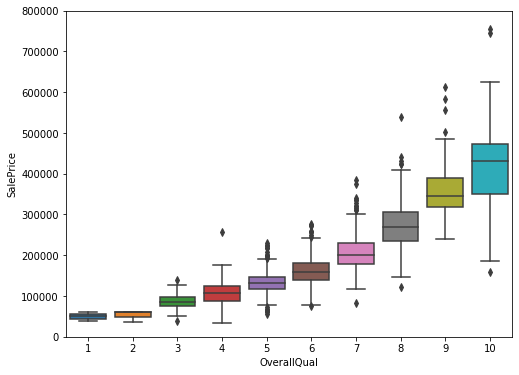

In [189]:
# box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)

(-0.5, 111.5, 0, 800000)

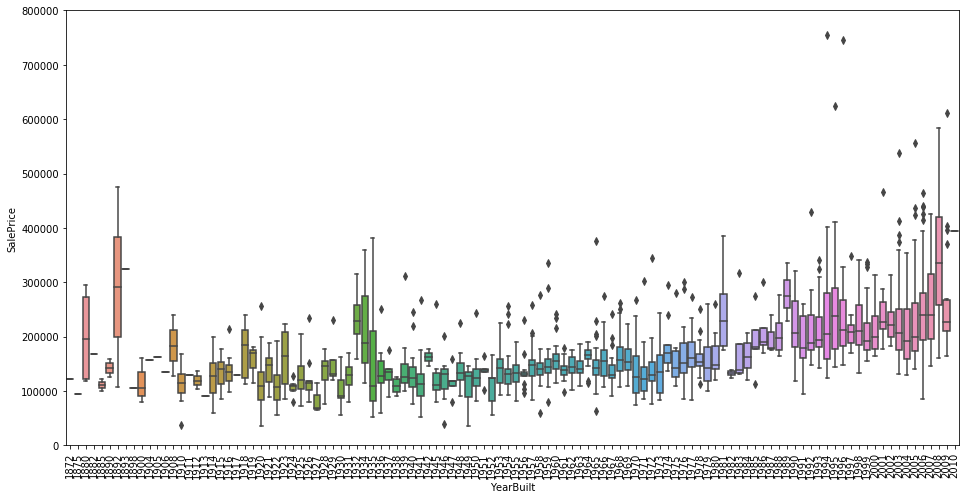

In [195]:
var = 'YearBuilt'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
fig, ax = plt.subplots(figsize = (16,8))
fig = sns.boxplot(x=var, y=df['SalePrice'], data=data)
plt.xticks(rotation=90)
fig.axis(ymin=0, ymax=800000)

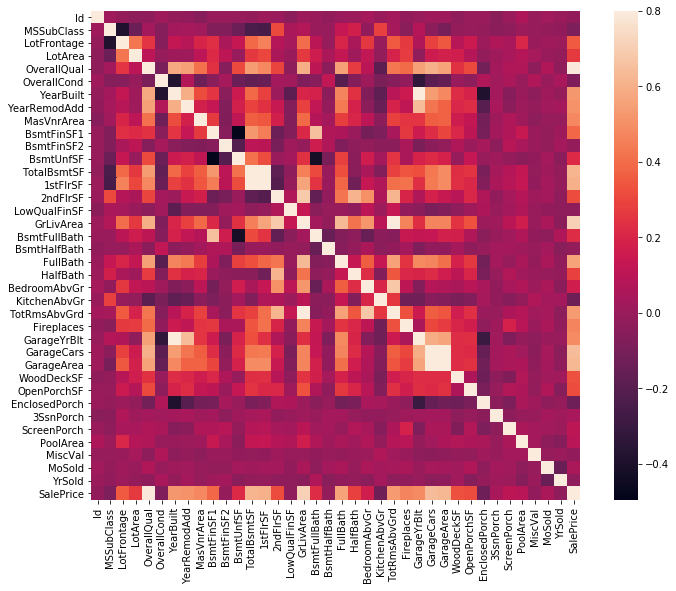

In [196]:
corrmat = df.corr()
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)

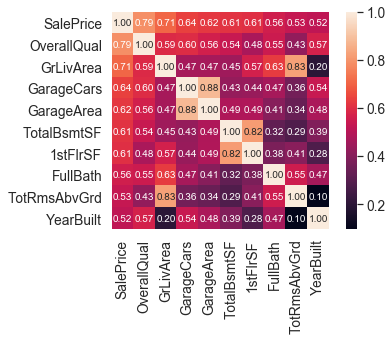

In [229]:
# saleprice correlation matrix
k=10 # number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


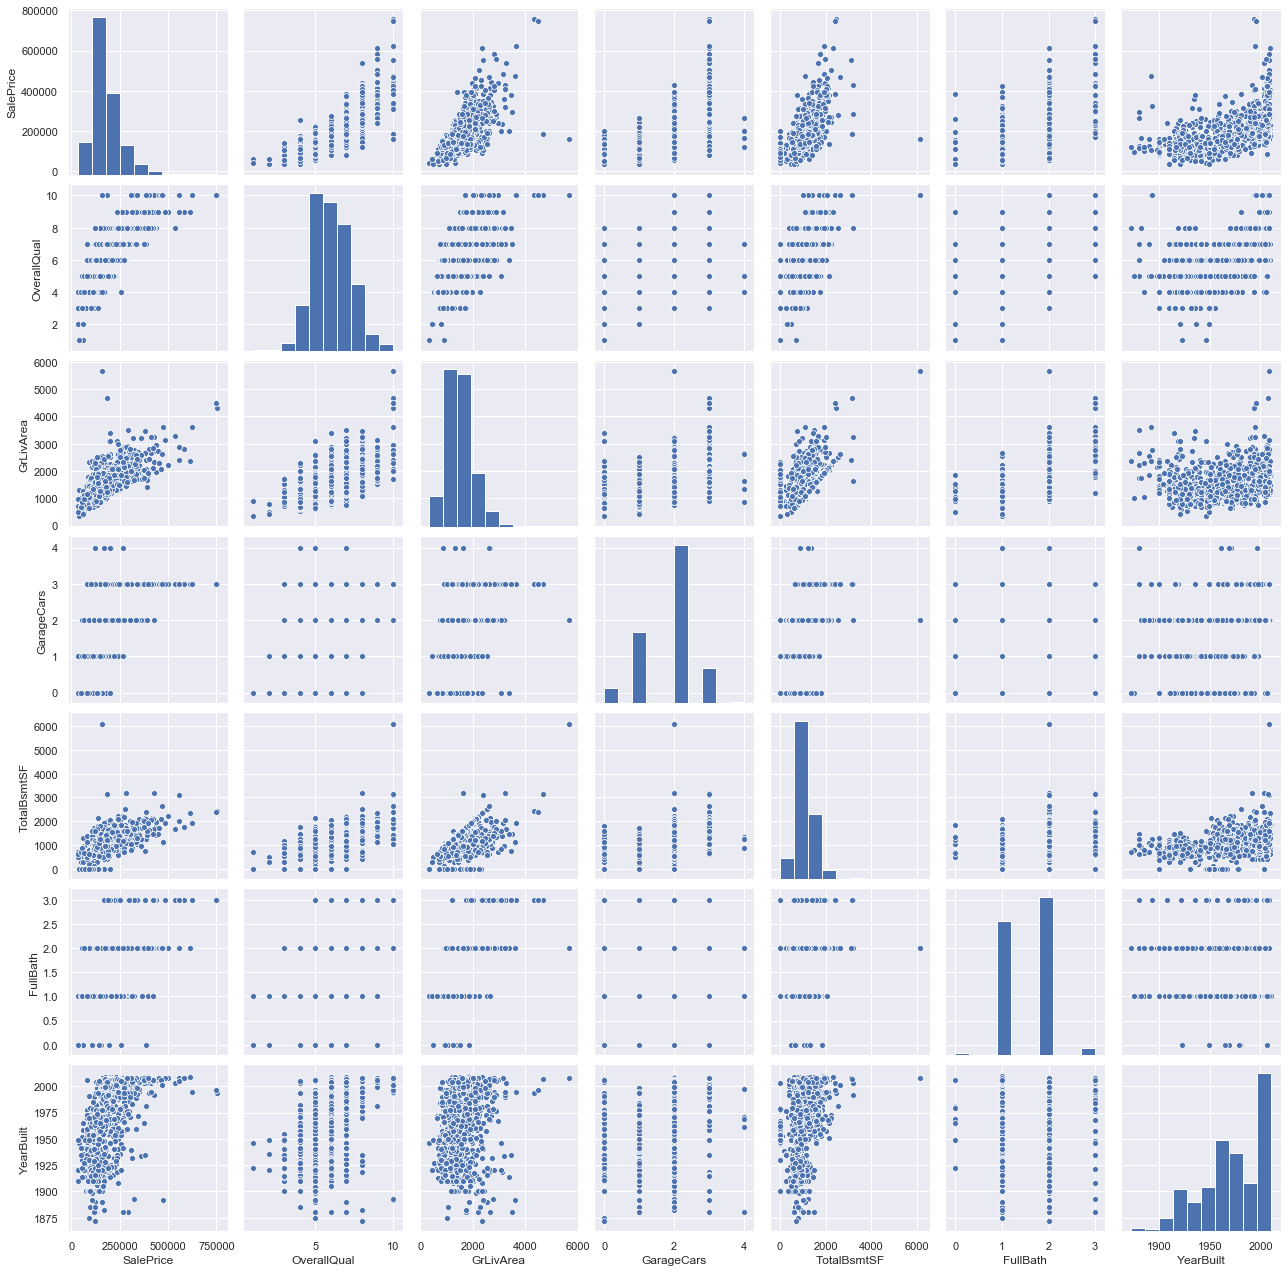

In [231]:
# scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size=2.5)
plt.show()

In [247]:
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [250]:
# standardizing data

saleprice_scaled = StandardScaler().fit_transform(df['SalePrice'][:, np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:, 0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:, 0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distibution:')
print(high_range)


outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distibution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


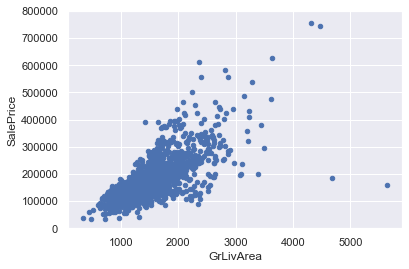

In [253]:
# bivariate analysis saleprice/grlivarea

var = 'GrLivArea'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

In [256]:
# deleting points

df.sort_values(by='GrLivArea', ascending=False)[:2]
df = df.drop(df[df['Id'] == 1299].index)
df = df.drop(df[df['Id'] == 524].index)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


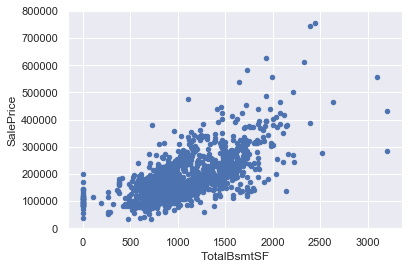

In [257]:
# bivariate analysis saleprice/grlivarea

var = 'TotalBsmtSF'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

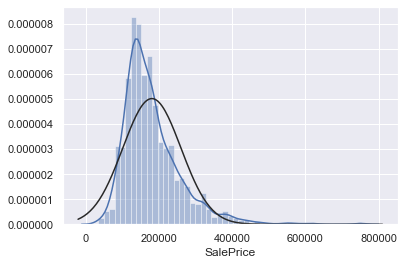

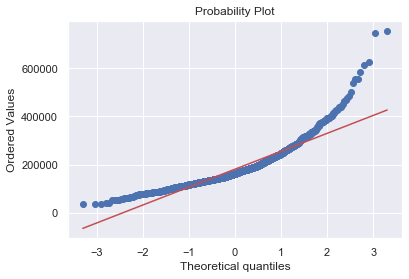

In [258]:
# histogram and normal probabality plot
sns.distplot(df['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

In [259]:
df['SalePrice'] = np.log(df['SalePrice'])

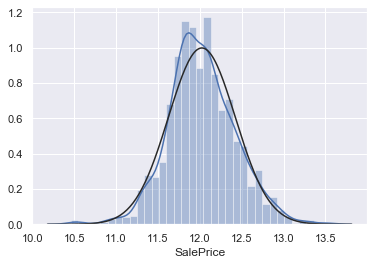

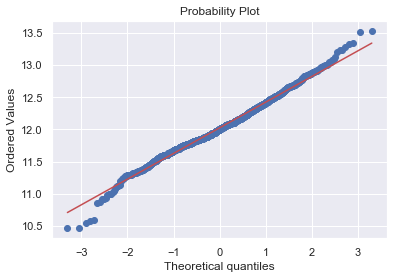

In [266]:
# transformed histogram and normal probability plot
sns.distplot(df['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)


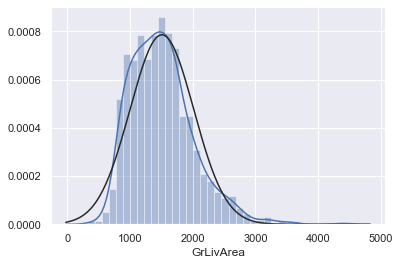

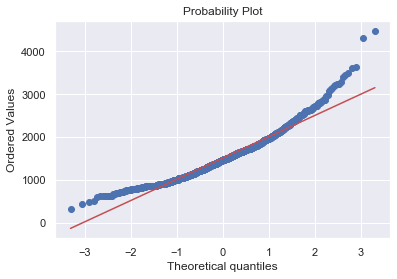

In [267]:
sns.distplot(df['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(df['GrLivArea'], plot=plt)

In [268]:
df['GrLivArea'] = np.log(df['GrLivArea'])

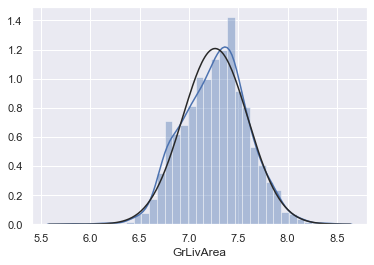

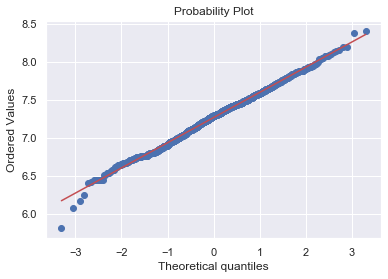

In [269]:
sns.distplot(df['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(df['GrLivArea'], plot=plt)

In [273]:

#if area>0 it gets 1, for area==0 it gets 0
df['HasBsmt'] = pd.Series(len(df['TotalBsmtSF']), index=df.index)
df['HasBsmt'] = 0 
df.loc[df['TotalBsmtSF']>0,'HasBsmt'] = 1

In [274]:
# transform data
df.loc[df['HasBsmt']==1,'TotalBsmtSF'] = np.log(df['TotalBsmtSF'])

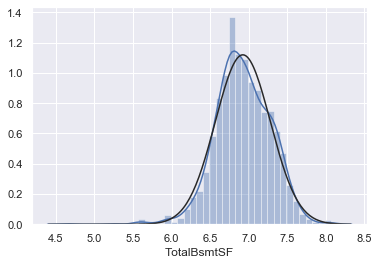

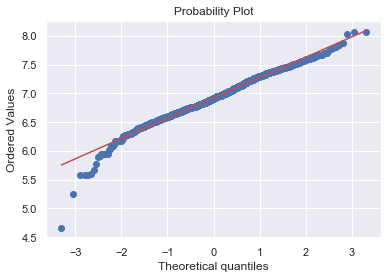

In [275]:
#histogram and normal probability plot
sns.distplot(df[df['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df[df['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

In [277]:
#convert categorical variable into dummy
df = pd.get_dummies(df)

In [278]:
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0
